### Data Wrangling

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fileloc = '/Users/arizeb/Desktop/SpringBoard - Data Science Bootcamp/Capstone Project/Historical Product Demand.csv'

In [3]:
data = pd.read_csv(fileloc)

In [4]:
data_backup = pd.read_csv(fileloc)

In [5]:
data['Date']=pd.to_datetime(data['Date'], format="%Y/%m/%d")

In [6]:
data['Order_Demand'] = data['Order_Demand'].replace('[\$)]','', regex=True).replace( '[(]','-', regex=True).astype(float)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1048575 non-null object
Warehouse           1048575 non-null object
Product_Category    1048575 non-null object
Date                1037336 non-null datetime64[ns]
Order_Demand        1048575 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 40.0+ MB


In [8]:
data_notime = data_backup[(data['Date'].isnull())]

In [9]:
data_notime.describe()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
count,11239,11239,11239,0.0,11239
unique,82,1,7,0.0,350
top,Product_1424,Whse_A,Category_019,NaN,100
freq,1073,11239,10833,NaN,1534


In [10]:
data=data.dropna()

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
Product_Code        1037336 non-null object
Warehouse           1037336 non-null object
Product_Category    1037336 non-null object
Date                1037336 non-null datetime64[ns]
Order_Demand        1037336 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 47.5+ MB


Exploring values that are too small, too big and negative

In [12]:
data_pos=data[(data['Order_Demand']<1000000) & (data['Order_Demand'] > 0)]

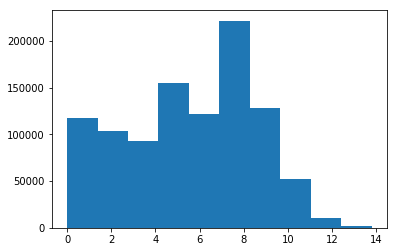

In [13]:
plt.hist(np.log(data_pos['Order_Demand']))
plt.show()

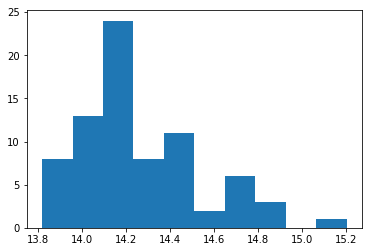

In [14]:
data_high=data[data['Order_Demand']>1000000]
plt.hist(np.log(data_high['Order_Demand']))
plt.show()

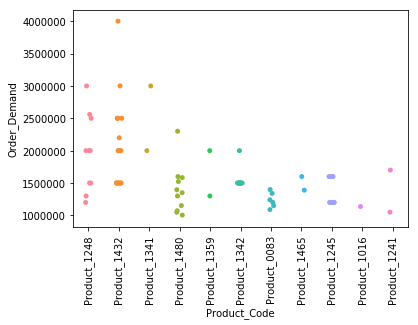

In [15]:
sns.stripplot(x='Product_Code', y='Order_Demand', data = data_high,
             jitter = True)
plt.xticks(rotation=90)
plt.show()

In [16]:
data_high.describe()

,Order_Demand
count,7.600000e+01
mean,1.676263e+06
std,5.560460e+05
min,1.005000e+06
25%,1.300000e+06
50%,1.500000e+06
75%,2.000000e+06
max,4.000000e+06


In [17]:
data_neg=data[data['Order_Demand']<0]

In [18]:
data_neg.describe()

,Order_Demand
count,5899.000000
mean,-2570.071199
std,20893.000006
min,-999000.000000
25%,-500.000000
50%,-50.000000
75%,-7.000000
max,-1.000000


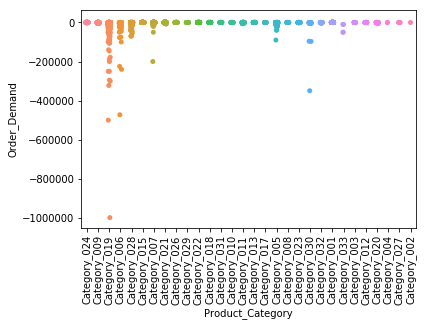

In [19]:
sns.stripplot(x='Product_Category', y='Order_Demand', data = data_neg,
             jitter = True)
plt.xticks(rotation=90)
plt.show()

In [20]:
data_temp = data['Order_Demand']
data_temp[data_temp<0] = 0
data['Order_Demand'] = data_temp

In [21]:
data_meanperyear = data.groupby(['Date'])['Order_Demand'].count()

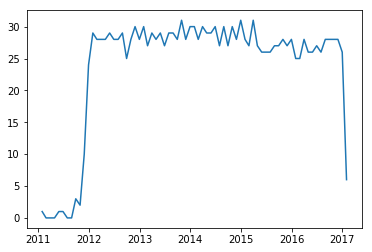

In [22]:
plt.plot(data_meanperyear.resample('m').count())
plt.show()